In [11]:
%reload_ext tensorboard

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layers
from keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

import data_processing

In [12]:
data_frame = pd.read_csv('matches.csv')
data_frame.head()

,match_id,winners,team0_p0_current_tier,team0_p0_current_division,team0_p0_current_league_points,team0_p0_current_win_rate,team0_p0_summoner_name,team0_p0_win_rate_avg,team0_p0_live_champion_win_rate,team0_p0_live_champion_name,...,team1_p4_first_blood_assist,team1_p4_first_tower_kill,team1_p4_damage_dealt_to_buildings,team1_p4_damage_dealt_to_objectives,team1_p4_vision_score,team1_p4_wards_placed,team1_p4_wards_killed,team1_p4_total_minions_killed,team1_p4_game_ended_in_early_surrender,team1_p4_game_ended_in_surrender
0,EUW1_6575498124,1,GRANDMASTER,I,503,0.573770,Tirtile,0.8,0.0,Kennen,...,0.2,0.0,185.8,1944.6,40.6,23.8,3.0,16.2,0.0,0.2
1,EUW1_6544603396,0,MASTER,I,24,0.469880,Gundeer,0.4,0.0,Sett,...,0.0,0.0,970.0,1641.8,44.4,19.0,4.2,45.8,0.0,0.4
2,EUW1_6575092867,0,BRONZE,IV,46,0.448980,4ear,0.0,0.0,Mordekaiser,...,0.0,0.0,2233.8,4797.2,38.0,14.8,2.6,39.6,0.0,0.4
3,EUW1_6575468093,1,CHALLENGER,I,970,0.616279,mustangGTD,0.2,0.0,Camille,...,0.2,0.0,640.2,2538.2,39.6,18.6,6.0,22.6,0.0,0.2
4,EUW1_6532178929,0,DIAMOND,III,71,0.525641,Zaelrae,0.2,0.0,Shen,...,0.4,0.2,4638.6,18723.8,36.4,17.4,3.2,216.2,0.0,0.0


In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78215 entries, 0 to 78214
Columns: 342 entries, match_id to team1_p4_game_ended_in_surrender
dtypes: float64(260), int64(11), object(71)
memory usage: 204.1+ MB


In [14]:
data_frame.head()

,match_id,winners,team0_p0_current_tier,team0_p0_current_division,team0_p0_current_league_points,team0_p0_current_win_rate,team0_p0_summoner_name,team0_p0_win_rate_avg,team0_p0_live_champion_win_rate,team0_p0_live_champion_name,...,team1_p4_first_blood_assist,team1_p4_first_tower_kill,team1_p4_damage_dealt_to_buildings,team1_p4_damage_dealt_to_objectives,team1_p4_vision_score,team1_p4_wards_placed,team1_p4_wards_killed,team1_p4_total_minions_killed,team1_p4_game_ended_in_early_surrender,team1_p4_game_ended_in_surrender
0,EUW1_6575498124,1,GRANDMASTER,I,503,0.573770,Tirtile,0.8,0.0,Kennen,...,0.2,0.0,185.8,1944.6,40.6,23.8,3.0,16.2,0.0,0.2
1,EUW1_6544603396,0,MASTER,I,24,0.469880,Gundeer,0.4,0.0,Sett,...,0.0,0.0,970.0,1641.8,44.4,19.0,4.2,45.8,0.0,0.4
2,EUW1_6575092867,0,BRONZE,IV,46,0.448980,4ear,0.0,0.0,Mordekaiser,...,0.0,0.0,2233.8,4797.2,38.0,14.8,2.6,39.6,0.0,0.4
3,EUW1_6575468093,1,CHALLENGER,I,970,0.616279,mustangGTD,0.2,0.0,Camille,...,0.2,0.0,640.2,2538.2,39.6,18.6,6.0,22.6,0.0,0.2
4,EUW1_6532178929,0,DIAMOND,III,71,0.525641,Zaelrae,0.2,0.0,Shen,...,0.4,0.2,4638.6,18723.8,36.4,17.4,3.2,216.2,0.0,0.0


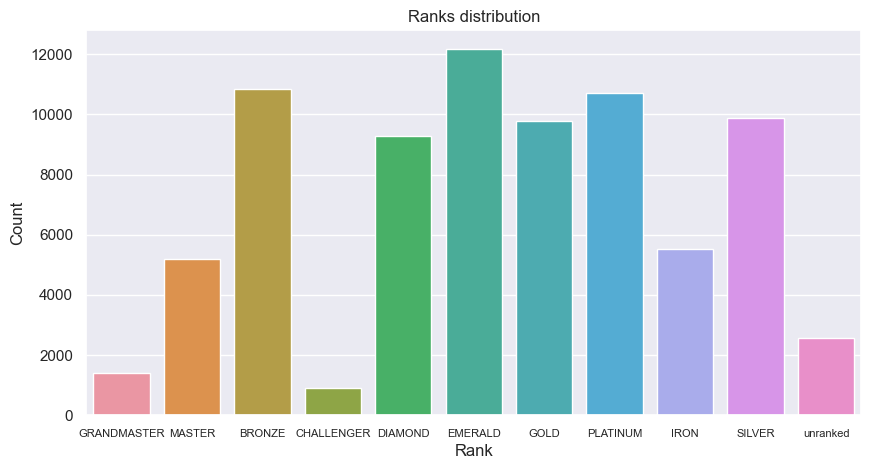

In [15]:
plt.figure(figsize=(10, 5))

sns.countplot(x='team0_p0_current_tier', data=data_frame)
sns.set(font_scale=1)

plt.xticks(size=8)
plt.title('Ranks distribution')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.show()

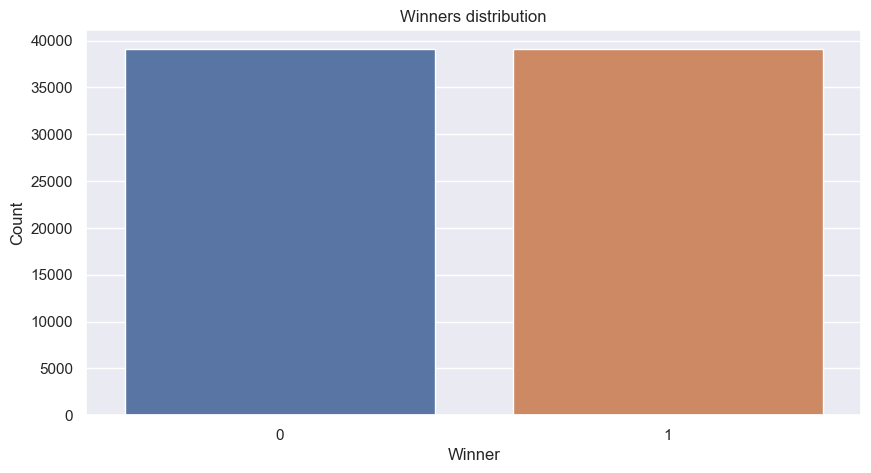

In [16]:
plt.figure(figsize=(10, 5))

sns.countplot(x='winners', data=data_frame)
plt.title('Winners distribution')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.show()

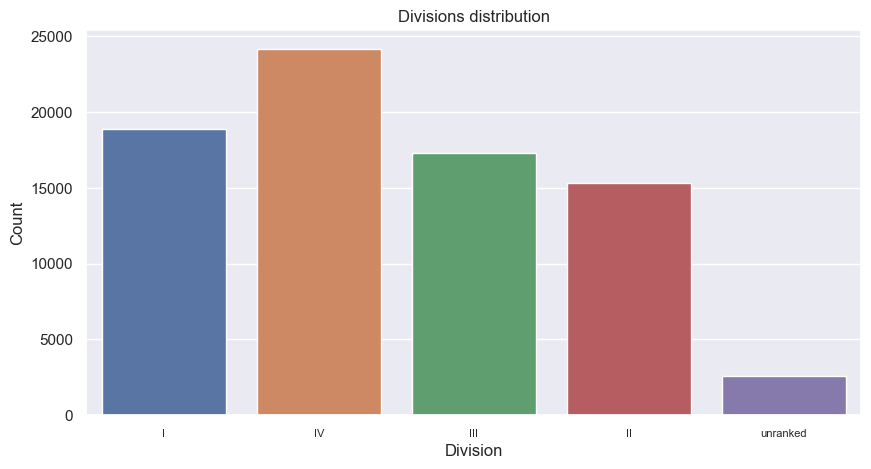

In [17]:
plt.figure(figsize=(10, 5))

sns.countplot(x='team0_p0_current_division', data=data_frame)
sns.set(font_scale=1)

plt.xticks(size=8)
plt.title('Divisions distribution')
plt.xlabel('Division')
plt.ylabel('Count')
plt.show()

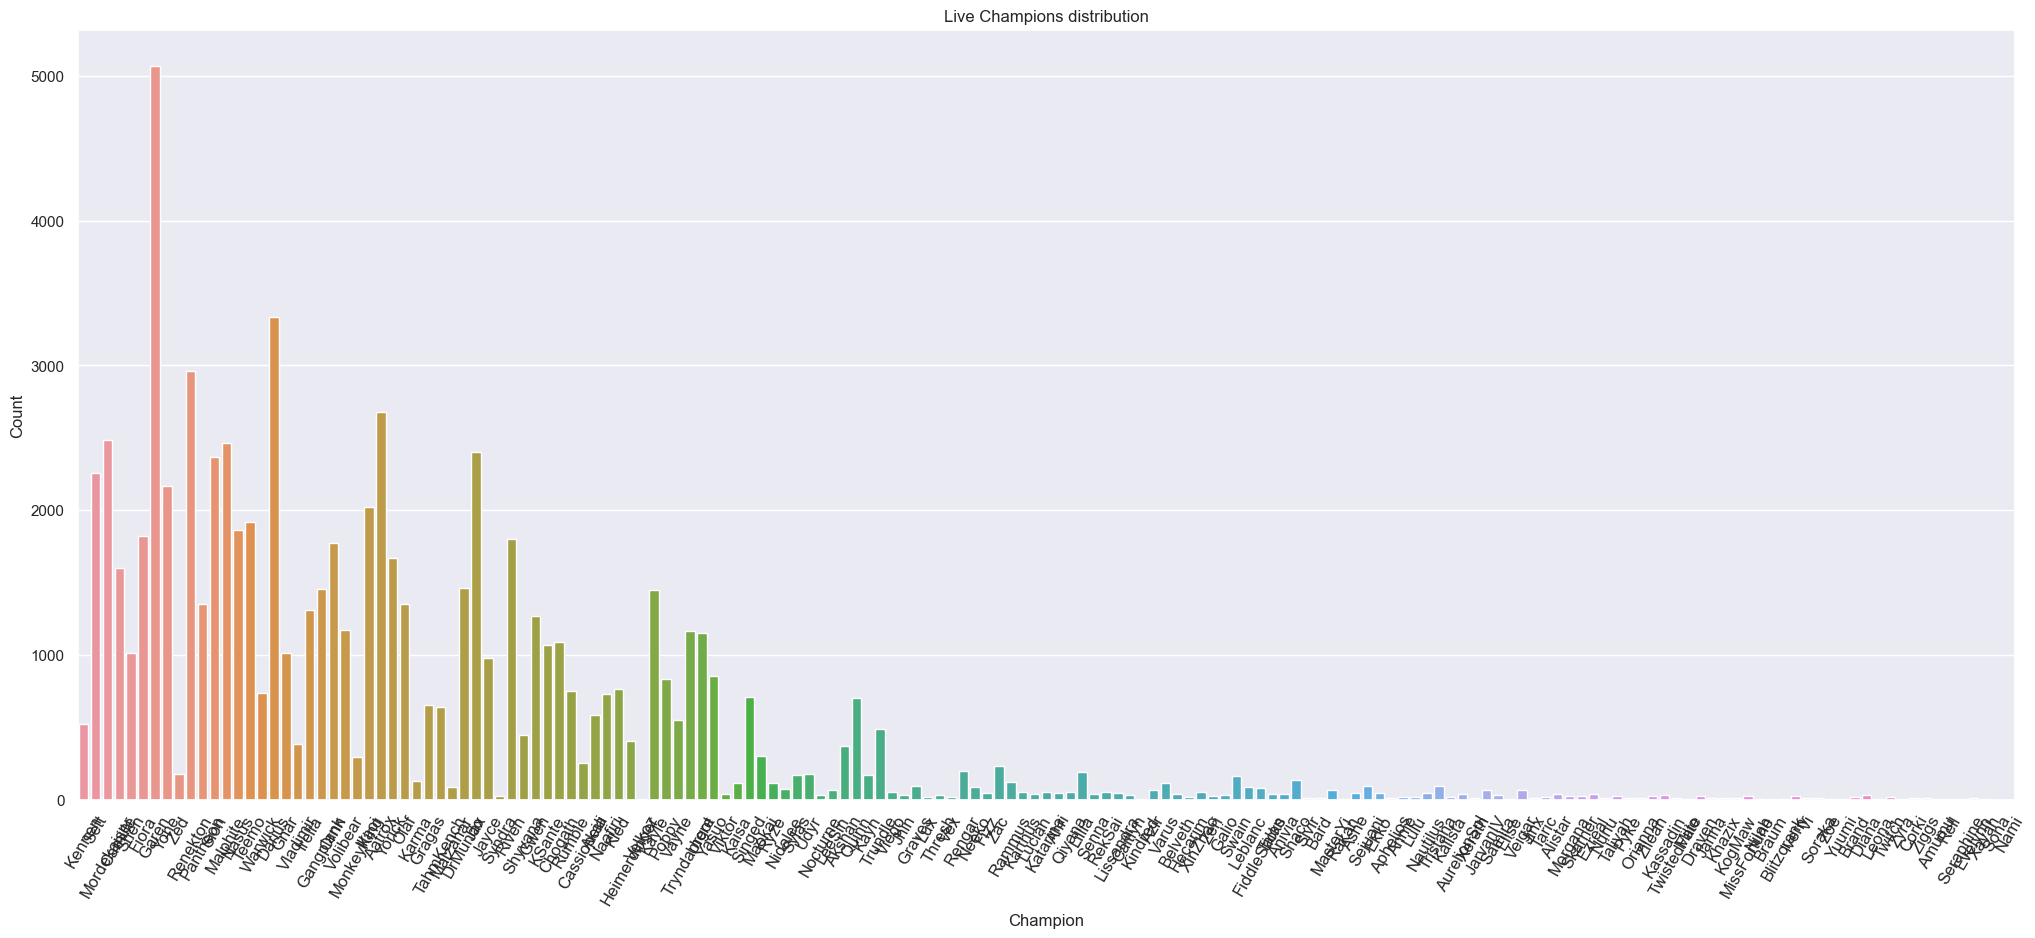

In [18]:
plt.figure(figsize=(25, 10))

sns.countplot(x='team0_p0_live_champion_name', data=data_frame)
sns.set(font_scale=1)

plt.xticks(rotation=60, size=12)
plt.title('Live Champions distribution')
plt.xlabel('Champion')
plt.ylabel('Count')
plt.show()

In [19]:
# Removing columns with non-representable values

data_frame = data_frame[~data_frame.apply(lambda row: (row.astype(str).str.contains('unranked|unknown|MASTER|GRANDMASTER|CHALLENGER')).any(), axis=1)]
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49044 entries, 2 to 78214
Columns: 342 entries, match_id to team1_p4_game_ended_in_surrender
dtypes: float64(260), int64(11), object(71)
memory usage: 128.3+ MB


In [20]:
# Drop the 'match_id' column
data_frame.drop('match_id', axis=1, inplace=True)

for i in range(2):
    for j in range(5):
        columns_to_drop = [
            f'team{i}_p{j}_summoner_name',
            f'team{i}_p{j}_first_blood_kill',
            f'team{i}_p{j}_first_blood_assist',
            f'team{i}_p{j}_game_ended_in_early_surrender',
            f'team{i}_p{j}_game_ended_in_surrender',
            f'team{i}_p{j}_double_kills',
            f'team{i}_p{j}_triple_kills',
            f'team{i}_p{j}_quadra_kills',
            f'team{i}_p{j}_penta_kills',
            f'team{i}_p{j}_first_tower_kill',
            f'team{i}_p{j}_total_damage_dealt_to_champion',
            f'team{i}_p{j}_total_damage_taken',
            f'team{i}_p{j}_damage_dealt_to_objectives',
            f'team{i}_p{j}_damage_dealt_to_buildings',
            f'team{i}_p{j}_vision_score',
            f'team{i}_p{j}_wards_placed',
            f'team{i}_p{j}_wards_killed',
        ]

        data_frame.drop(columns_to_drop, axis=1, inplace=True)

        # Lowercase champion name columns
        data_frame[f'team{i}_p{j}_main_champion_name'] = data_frame[f'team{i}_p{j}_main_champion_name'].str.lower()
        data_frame[f'team{i}_p{j}_live_champion_name'] = data_frame[f'team{i}_p{j}_live_champion_name'].str.lower()

        data_frame[f'team{i}_p{j}_current_division'] = data_frame.apply(
            lambda row: data_processing.rank_to_mmr(row[f'team{i}_p{j}_current_tier'], row[f'team{i}_p{j}_current_division']), axis=1)

        data_frame[f'team{i}_p{j}_assists'] = (data_frame[f'team{i}_p{j}_kills'] + data_frame[f'team{i}_p{j}_assists']) / (data_frame[f'team{i}_p{j}_deaths'] + 1)

        data_frame[f'team{i}_p{j}_main_champion_name'] = (
            (data_frame[f'team{i}_p{j}_main_champion_name'] == data_frame[f'team{i}_p{j}_live_champion_name'])
            .astype(int))
        
        data_frame[f'team{i}_p{j}_main_team_position'] = (
            (data_frame[f'team{i}_p{j}_main_team_position'] == data_frame[f'team{i}_p{j}_live_team_position'])
            .astype(int))

        data_frame.drop([f'team{i}_p{j}_current_tier'], axis=1, inplace=True)
        data_frame.drop([f'team{i}_p{j}_kills', f'team{i}_p{j}_deaths'], axis=1, inplace=True)

# Display the information of the modified DataFrame
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49044 entries, 2 to 78214
Columns: 141 entries, winners to team1_p4_total_minions_killed
dtypes: float64(80), int32(20), int64(21), object(20)
memory usage: 49.4+ MB


In [21]:
import json

matches_features = data_frame.copy()
matches_labels = matches_features.pop('winners')

X_train, X_test, y_train, y_test = train_test_split(matches_features, matches_labels, test_size=0.1, random_state=42)
print('Datasets split successfully!')

print(len(X_train), 'Training samples')
print(len(X_test), 'Testing samples')

Datasets split successfully!
44139 Training samples
4905 Testing samples


In [22]:
simple_columns_name_to_encode = ['live_team_position', 'live_champion_name']

with open('../champion.json', encoding='utf-8') as f:
    champions = json.load(f)['data']

champions_name = [champion_name.lower() for champion_name in champions.keys()]
champions_name.append('unknown')
encoders = data_processing.Encoders(champions_name)

for column_name in simple_columns_name_to_encode:
    for i in range(2):
        for j in range(5):
            prefix = f'team{i}_p{j}_'
            column_name_to_encode = prefix + column_name
        
            if column_name.endswith('champion_name'):
                X_train[column_name_to_encode] = encoders.champion_name_encoder.transform(X_train[column_name_to_encode])
                X_test[column_name_to_encode] = encoders.champion_name_encoder.transform(X_test[column_name_to_encode])
            elif column_name.endswith('team_position'):
                X_train[column_name_to_encode] = encoders.position_encoder.transform(X_train[column_name_to_encode])
                X_test[column_name_to_encode] = encoders.position_encoder.transform(X_test[column_name_to_encode])
                
print('Columns hot encoded successfully!')

X_train, X_test = X_train / 255.0, X_test / 255.0

Columns hot encoded successfully!


In [23]:
X_train.head()

,team0_p0_current_division,team0_p0_current_league_points,team0_p0_current_win_rate,team0_p0_win_rate_avg,team0_p0_live_champion_win_rate,team0_p0_live_champion_name,team0_p0_main_champion_name,team0_p0_kill_participation,team0_p0_live_team_position,team0_p0_main_team_position,...,team1_p4_live_champion_win_rate,team1_p4_live_champion_name,team1_p4_main_champion_name,team1_p4_kill_participation,team1_p4_live_team_position,team1_p4_main_team_position,team1_p4_assists,team1_p4_gold_earned,team1_p4_gold_spent,team1_p4_total_minions_killed
58021,6.274510,0.180392,0.001776,0.002353,0.000000,0.137255,0.000000,0.001225,0.011765,0.003922,...,0.0,0.596078,0.000000,0.002169,0.015686,0.003922,0.007461,31.714510,28.623529,0.145882
52093,6.666667,0.000000,0.001900,0.001569,0.001307,0.184314,0.003922,0.001606,0.011765,0.003922,...,0.0,0.643137,0.000000,0.001879,0.015686,0.003922,0.007731,41.927059,38.858824,0.461176
22476,0.000000,0.101961,0.001961,0.002353,0.002353,0.443137,0.003922,0.001350,0.011765,0.003922,...,0.0,0.160784,0.000000,0.002016,0.015686,0.003922,0.008590,49.382745,46.967059,0.444706
17210,3.529412,0.356863,0.002112,0.001569,0.000000,0.050980,0.000000,0.001525,0.011765,0.000000,...,0.0,0.058824,0.003922,0.001555,0.015686,0.000000,0.006328,46.260392,45.788235,0.416471
26714,6.666667,0.047059,0.001930,0.001569,0.001961,0.000000,0.003922,0.001610,0.011765,0.003922,...,0.0,0.058824,0.000000,0.001701,0.015686,0.000000,0.008245,48.863529,43.025882,0.604706


In [24]:
BATCH_SIZE = 32
MAX_EPOCHS = 200

In [25]:
import datetime

log_dir = "./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath=log_dir + '/model.h5', save_best_only=True, monitor='val_loss', verbose=1),
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001, verbose=1)
]

In [26]:
model = Sequential([
    layers.BatchNormalization(input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.Dense(8, activation='relu', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
              
print('Model compiled successfully!')

history = model.fit(X_train, y_train, epochs=MAX_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=callbacks)

print('Model fitted successfully!')
print('Evaluating model...')

model.evaluate(X_test, y_test)

Model compiled successfully!
Epoch 1/200
1100/1104 [============================>.] - ETA: 0s - loss: 0.8111 - accuracy: 0.5174
Epoch 1: val_loss improved from inf to 0.73201, saving model to ./logs/fit/20231008-182653\model.h5
1104/1104 [==============================] - 13s 8ms/step - loss: 0.8109 - accuracy: 0.5174 - val_loss: 0.7320 - val_accuracy: 0.5510 - lr: 0.0010
Epoch 2/200
1099/1104 [============================>.] - ETA: 0s - loss: 0.7098 - accuracy: 0.5617
Epoch 2: val_loss improved from 0.73201 to 0.68697, saving model to ./logs/fit/20231008-182653\model.h5
1104/1104 [==============================] - 9s 8ms/step - loss: 0.7099 - accuracy: 0.5615 - val_loss: 0.6870 - val_accuracy: 0.5939 - lr: 0.0010
Epoch 3/200
1104/1104 [==============================] - ETA: 0s - loss: 0.6814 - accuracy: 0.5958
Epoch 3: val_loss improved from 0.68697 to 0.67351, saving model to ./logs/fit/20231008-182653\model.h5
1104/1104 [==============================] - 9s 8ms/step - loss: 0.6814 -

[0.5784685015678406, 0.7005096673965454]